# Hypothyroid Disease Prediction Using Random Foreset and SVM Classifiers

## Business Understanding

### Specifying the Question

A Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. 

Use the datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.
Classifiers to use are:
1. Decision tree based classifers :- Random forests, Ada boosted trees, and gradient boosted trees.
2. SVM - Apply Polynomial, linear and rbf kernel functions and compare their performances

### Metric for success
- Classification accuracy - low variance and low bias.
- Root mean square error - minimal value of the error.


### Understanding the context

Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. 
This may be the result of an absent thyroid gland due to surgical excision, or a gland that is producing insufficient thyroid hormones.

Main purpose of thyroid hormone is to "run the body's metabolism,". A person with hypothroidism will have symptoms associated with a slow metabolism.

Symptoms of hypothyroidism are extensive, and can be nonspecific, especially in older patients, and include: weight gain, cold intolerance, lethargy, weakness, constipation, hair changes, swelling and edema of extremities, and cardiac anomalies. Severe hypothyroidism is life threatening, and requires immediate treatment.

Sources: 
https://www.ent.uci.edu/clinical-specialties/thyroid-parathyroid-disorders/hypothyroidism.asp
https://www.niddk.nih.gov/health-information/endocrine-diseases/hypothyroidism

The hypothroid dataset provided by Moringa school(possibly sourced from UCI dataset) has 3,163 records and 26 columns.

### Recording the experimental design

CRISP- DM methodology will be applied. Below steps will be undertaken to create the classifer.

- Business understanding - understanding the background about hypothroidism
- Data understanding 
- Exploratory data analysis
- Feature engineering
- Data modelling
- Model interpretation

**Where is Thyroid grand located?**
<html>
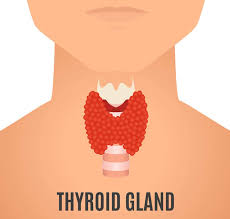
</htmls>

## Libraries and Data Importation

In [152]:
## Import Libraries
# Data Manipulation libraries
import pandas as pd
import numpy as np
import math
from scipy import stats
# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline 
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina' 
import seaborn as sns
# Change style to have more beatiful graphs based on 538 style
plt.style.use('fivethirtyeight')
# Improving the appearance of graphs
sns.set(rc={'figure.figsize':(10, 8)})

# One label encoding library
from sklearn import preprocessing 

# Modelling library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score,mean_absolute_error, mean_squared_error
import scipy.stats as stats
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

# Hide warnings related to numpy 
import warnings
warnings.filterwarnings("ignore")

In [153]:
# Increase rows and columns visible on the notebook
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 50)

In [154]:
# Import Dataset
df = pd.read_csv('hypothyroid.csv')

## Data Understanding

#### Sample records observations

In [155]:
# Check Sample Dataset: Objective: Observation of snapshot of dataset.
df.sample(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3034,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,2.30,y,110,y,1.12,y,98,n,?
1202,negative,71,M,f,f,f,f,f,f,f,f,f,f,f,y,0.50,y,0.70,y,71,y,0.78,y,91,n,?
554,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1.40,y,63,y,0.81,y,78,n,?
83,hypothyroid,43,M,f,f,f,f,f,f,f,f,f,f,f,y,20,y,2.80,y,24,y,0.94,y,26,n,?
2132,negative,?,F,f,f,f,f,t,f,f,f,f,f,f,y,0.50,y,2.10,y,56,y,0.96,y,58,n,?
772,negative,45,F,f,f,f,f,f,f,f,f,f,f,f,y,2,y,2.30,y,111,y,1.03,y,108,n,?
865,negative,20,F,f,f,f,f,f,f,f,f,f,f,f,y,0.50,y,2.90,y,138,y,1.32,y,105,n,?
200,negative,75,M,f,f,f,f,f,f,f,t,f,f,f,y,0.80,y,1.20,y,67,y,0.71,y,94,n,?
2048,negative,48,F,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,26
2682,negative,73,F,f,f,f,f,f,f,f,f,f,f,f,y,0.01,y,1,y,101,y,0.86,y,117,n,?


In [156]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

Some records with '?' as the value noted. Missing records analysis to be done

In [157]:
# Check number of columns and rows
df.shape

(3163, 26)

There are 3163 records and 26 columns

In [158]:
# Check Columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

All columns are of numeric of type object. Conversion to numeric required to enable modelling

#### Statistical Measures

In [159]:
#Check statistical summary of the dataset
df.describe(include ='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


Unique values observed. Where unique values are <=3, this shows binary output with third value being not null values.

In [160]:
#Most frequent values
df.mode()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?


#### Check Missing Values

In [161]:
# To check how many columns have missing values - this can be repeated to see the progress made
def show_missing(dataframe_name):
    print("Missing Values Count and Percentage")
    missing_all = dataframe_name.columns[df.isnull().any()].tolist()
    more_than_zero = dataframe_name[missing_all].isnull().sum().sort_values(ascending = False)
    percentage = more_than_zero/dataframe_name.shape[0]*100
    return more_than_zero, percentage


In [162]:
# Missing values
show_missing(df)

Missing Values Count and Percentage


(Series([], dtype: float64), Series([], dtype: float64))

No values displayed as missing. However, from observations in 3.0.1 above, some records have value '?'. This is essentially a missing value. To replace with np.nan to make it null value for imputation readiness.

In [163]:
# Replace null records with null
df = df.replace("?", np.nan)

In [164]:
#Recheck null records
show_missing(df)

Missing Values Count and Percentage


(TBG    2903
 T3      695
 TSH     468
 age     446
 TT4     249
 T4U     248
 FTI     247
 sex      73
 dtype: int64, TBG   91.780
 T3    21.973
 TSH   14.796
 age   14.101
 TT4    7.872
 T4U    7.841
 FTI    7.809
 sex    2.308
 dtype: float64)

Null values now visible across multiple columns. Imputation to be required to faciliate modeling.

TBG has 91% of the records missing. This percentage is too high hence column will be dropped.

T3 has the highest percentage of missing values which is 21%. Should this column be dropped or imputation to be done? T3 being a one of the hormones secreted by the thyroid is too important of a column to drop as it would mean losing 78% of the values. Therebeing, the values will be imputed during data cleaning stage rather than drop

#### Check duplicates

In [165]:
df.duplicated().sum()

77

There are noted duplicates

### Data Understanding Summary and Actions

Dataset has 3163 rows and 26 columns.

The dataset features and structure and explanation(from external search business understanding) are as below.

1. Status - categorical variable.  
Patient is Negative or positive with hypothyroidism
2. Age - continous integer.
Age of the patient in years.
3. Sex - categorical - Male or female.
4. on_thyroxine - categorical - True or False.
5. query_on_thyroxine - categorical - True or False.
6. on_antithyroid_medication - categorical - True or False.
7. thyroid_surgery - categorical - True or False.  Thyroid-stimulating hormone stimulates the thyroid gland to produce thyroxine.

8. query_hypothyroid - categorical - True or False.
9. query_hyperthyroid - categorical - True or False.
10. pregnant - categorical - True or False.
11. sick - categorical - True or False.
12. tumor - categorical - True or False. 
Mass of cells that grow around the throid. They can be malignant /evil (cancerous) or benign/gentle(non cancerous)
13. lithium - categorical - True or False. 
Is a medication which has biological effects on the thyroid.
14. goitre - categorical - True or False. 
A swelling of the neck resulting from enlargement of the thyroid gland.
15. TSH_measured - categorical - Yes or No.
16. TSH - Continous Float. 
Thyroid-stimulating hormone stimulates the thyroid gland to produce thyroxine.
17. T3_measured - categorical - Yes or No.
18. T3 - Continous Float.
T3 a.k.a triiodothyronine is a hormone produced by throid. It regulates the body's temperature, metabolism, and heart rate.
19. TT4_measured - categorical - Yes or No.
20. TT4 - Continous Integer.
Total thyroxine 4 is the principal hormone secreted by the thyroid gland. It regulates the body's temperature, metabolism, and heart rate just like T3.
21.	T4U_measured - categorical - Yes or No	
22.	T4U	- continous Float 
23.	FTI_measured - categorical - Yes or No	
24.	FTI	- continous integer 
25.	TBG_measured - categorical - Yes or No
26. TBG - - continous integer 


**Actions**
1. Convert object to Numeric data types.
2. Null values exist which are exist in dataset with values '?'. Conversion to Nan was done to identify the records as null values.  Imputation to be done.
Null columns are: 
T3  - 695
TSH - 468
age - 446
TT4 - 249
T4U - 248
FTI - 247
sex - 73

3. Convert columns data types from object to numerical (either integer or float)
The columns that will be converted to float are 
a) 
TSH
T3
b) All the others will be converted to integer as they don't have fraction values.

4. 77 duplicate records exist. Review if to drop them or maintain the records.
5. Outliers : TBG has outliers

## Data Preparation

### Data Cleaning

#### Conversion from Object to Numeric data type
Two approaches to be employed:

a) Casting to be done to columns which have numeric or float values.

In [166]:
## Casting from string to float. Note: Casting to Integer fails because of null values
df['age'] = df['age'].astype(float)
df['TSH'] = df['TSH'].astype(float)
df['T3'] = df['T3'].astype(float)
df['TT4'] = df['TT4'].astype(float)
df['T4U'] = df['T4U'].astype(float)
df['FTI'] = df['FTI'].astype(float)
df['TBG'] = df['TBG'].astype(float)


b) Replacement to be done to the columns which have binary values

In [167]:
# 1 implies has hypothyroid  and 0 is negative
df['status'].replace(['hypothyroid', 'negative'],[1,0],inplace=True)
# 1 is male, 0 is female
df['sex'].replace(['M', 'F'],[1,0],inplace=True)
# 1 is positive and 0 is false
df['on_thyroxine'].replace(['t', 'f'],[1,0],inplace=True)
df['query_on_thyroxine'].replace(['t', 'f'],[1,0],inplace=True)
df['on_antithyroid_medication'].replace(['t', 'f'],[1,0],inplace=True)
df['thyroid_surgery'].replace(['t', 'f'],[1,0],inplace=True)
df['query_hypothyroid'].replace(['t', 'f'],[1,0],inplace=True)
df['query_hyperthyroid'].replace(['t', 'f'],[1,0],inplace=True)
df['pregnant'].replace(['t', 'f'],[1,0],inplace=True)
df['sick'].replace(['t', 'f'],[1,0],inplace=True)
df['tumor'].replace(['t', 'f'],[1,0],inplace=True)
df['lithium'].replace(['t', 'f'],[1,0],inplace=True)
df['goitre'].replace(['t', 'f'],[1,0],inplace=True)

# 1 is yes and 0 is n
df['TSH_measured'].replace(['y', 'n'],[1,0],inplace=True)
df['T3_measured'].replace(['y', 'n'],[1,0],inplace=True)
df['TT4_measured'].replace(['y', 'n'],[1,0],inplace=True)
df['T4U_measured'].replace(['y', 'n'],[1,0],inplace=True)
df['FTI_measured'].replace(['y', 'n'],[1,0],inplace=True)
df['TBG_measured'].replace(['y', 'n'],[1,0],inplace=True)

#### Treatment of missing values

Possible actions are:

a) Discard instances of missing features or whole feature.

b) Impute missing value using a measure of central tendancy e.g using mean, median, mode or a specific value e.g 0 or -1 or -99

c) Impute missing value using other features using regression or classification depending on the datatype. 

In [168]:
#Drop TBG feature as it has over 91% missing values.
df.drop('TBG', axis = 1, inplace = True)

**Imputation of other Columns**

**Column  Missing  Outliers       Fill with**

T3        695      Has outliers   median

TSH       468      Has outliers   median

age       446      No outliers    mean

TT4       249      Has outliers   median

T4U       248      Has outliers   median

FTI       247      Has outliers   median

sex       73       No outliers    Mode as it's categorical

In [169]:
# Approach 1: Impute with mean of whole group

def fillmissing(dataframe_name, column_name,approach):
    if approach == 'mean':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].mean()))
    elif approach=='median':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].median()))
    elif approach=='mode':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].median()))


In [170]:
#Impute missing values. Median imputation is because of outliers.
fillmissing(df,'T3','median') 
fillmissing(df,'TSH','median')
fillmissing(df,'age','mean') #Has no outliers
fillmissing(df,'TT4','median')
fillmissing(df,'T4U','median')
fillmissing(df,'FTI','median')
fillmissing(df,'sex','mode') #Categorical

In [115]:
# # Approach 2
# #Replace missing values with average of status
# T3_status = df.groupby('status')['T3'].median()
# df['T3_missing'] = df['status'].apply(lambda x: T3_status[x])
# # replace all missing ages with the value in this column
# df['T3'].fillna(df['T3_missing'], inplace=True, )
# del df['T3_missing']

In [174]:
# Recheck null values
show_missing(df)

Missing Values Count and Percentage


(Series([], dtype: float64), Series([], dtype: float64))

No columns with missing values after imputation.

In [175]:
# Check data types to validate that no column has object data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
status                       3163 non-null int64
age                          3163 non-null float64
sex                          3163 non-null float64
on_thyroxine                 3163 non-null int64
query_on_thyroxine           3163 non-null int64
on_antithyroid_medication    3163 non-null int64
thyroid_surgery              3163 non-null int64
query_hypothyroid            3163 non-null int64
query_hyperthyroid           3163 non-null int64
pregnant                     3163 non-null int64
sick                         3163 non-null int64
tumor                        3163 non-null int64
lithium                      3163 non-null int64
goitre                       3163 non-null int64
TSH_measured                 3163 non-null int64
TSH                          3163 non-null float64
T3_measured                  3163 non-null int64
T3                           3163 non-null float64
TT4

#### Drop duplicate values

In [177]:
# Drop the duplicate rows from the dataset except for the first row
df_all = df.copy()
df = df.drop_duplicates()

In [178]:
# Count of rows dropped
print(df_all.shape[0] - df.shape[0] , 'rows dropped')

156 rows dropped


### Exploratory Data Analysis

#### Univariate Analysis

##### Distribution

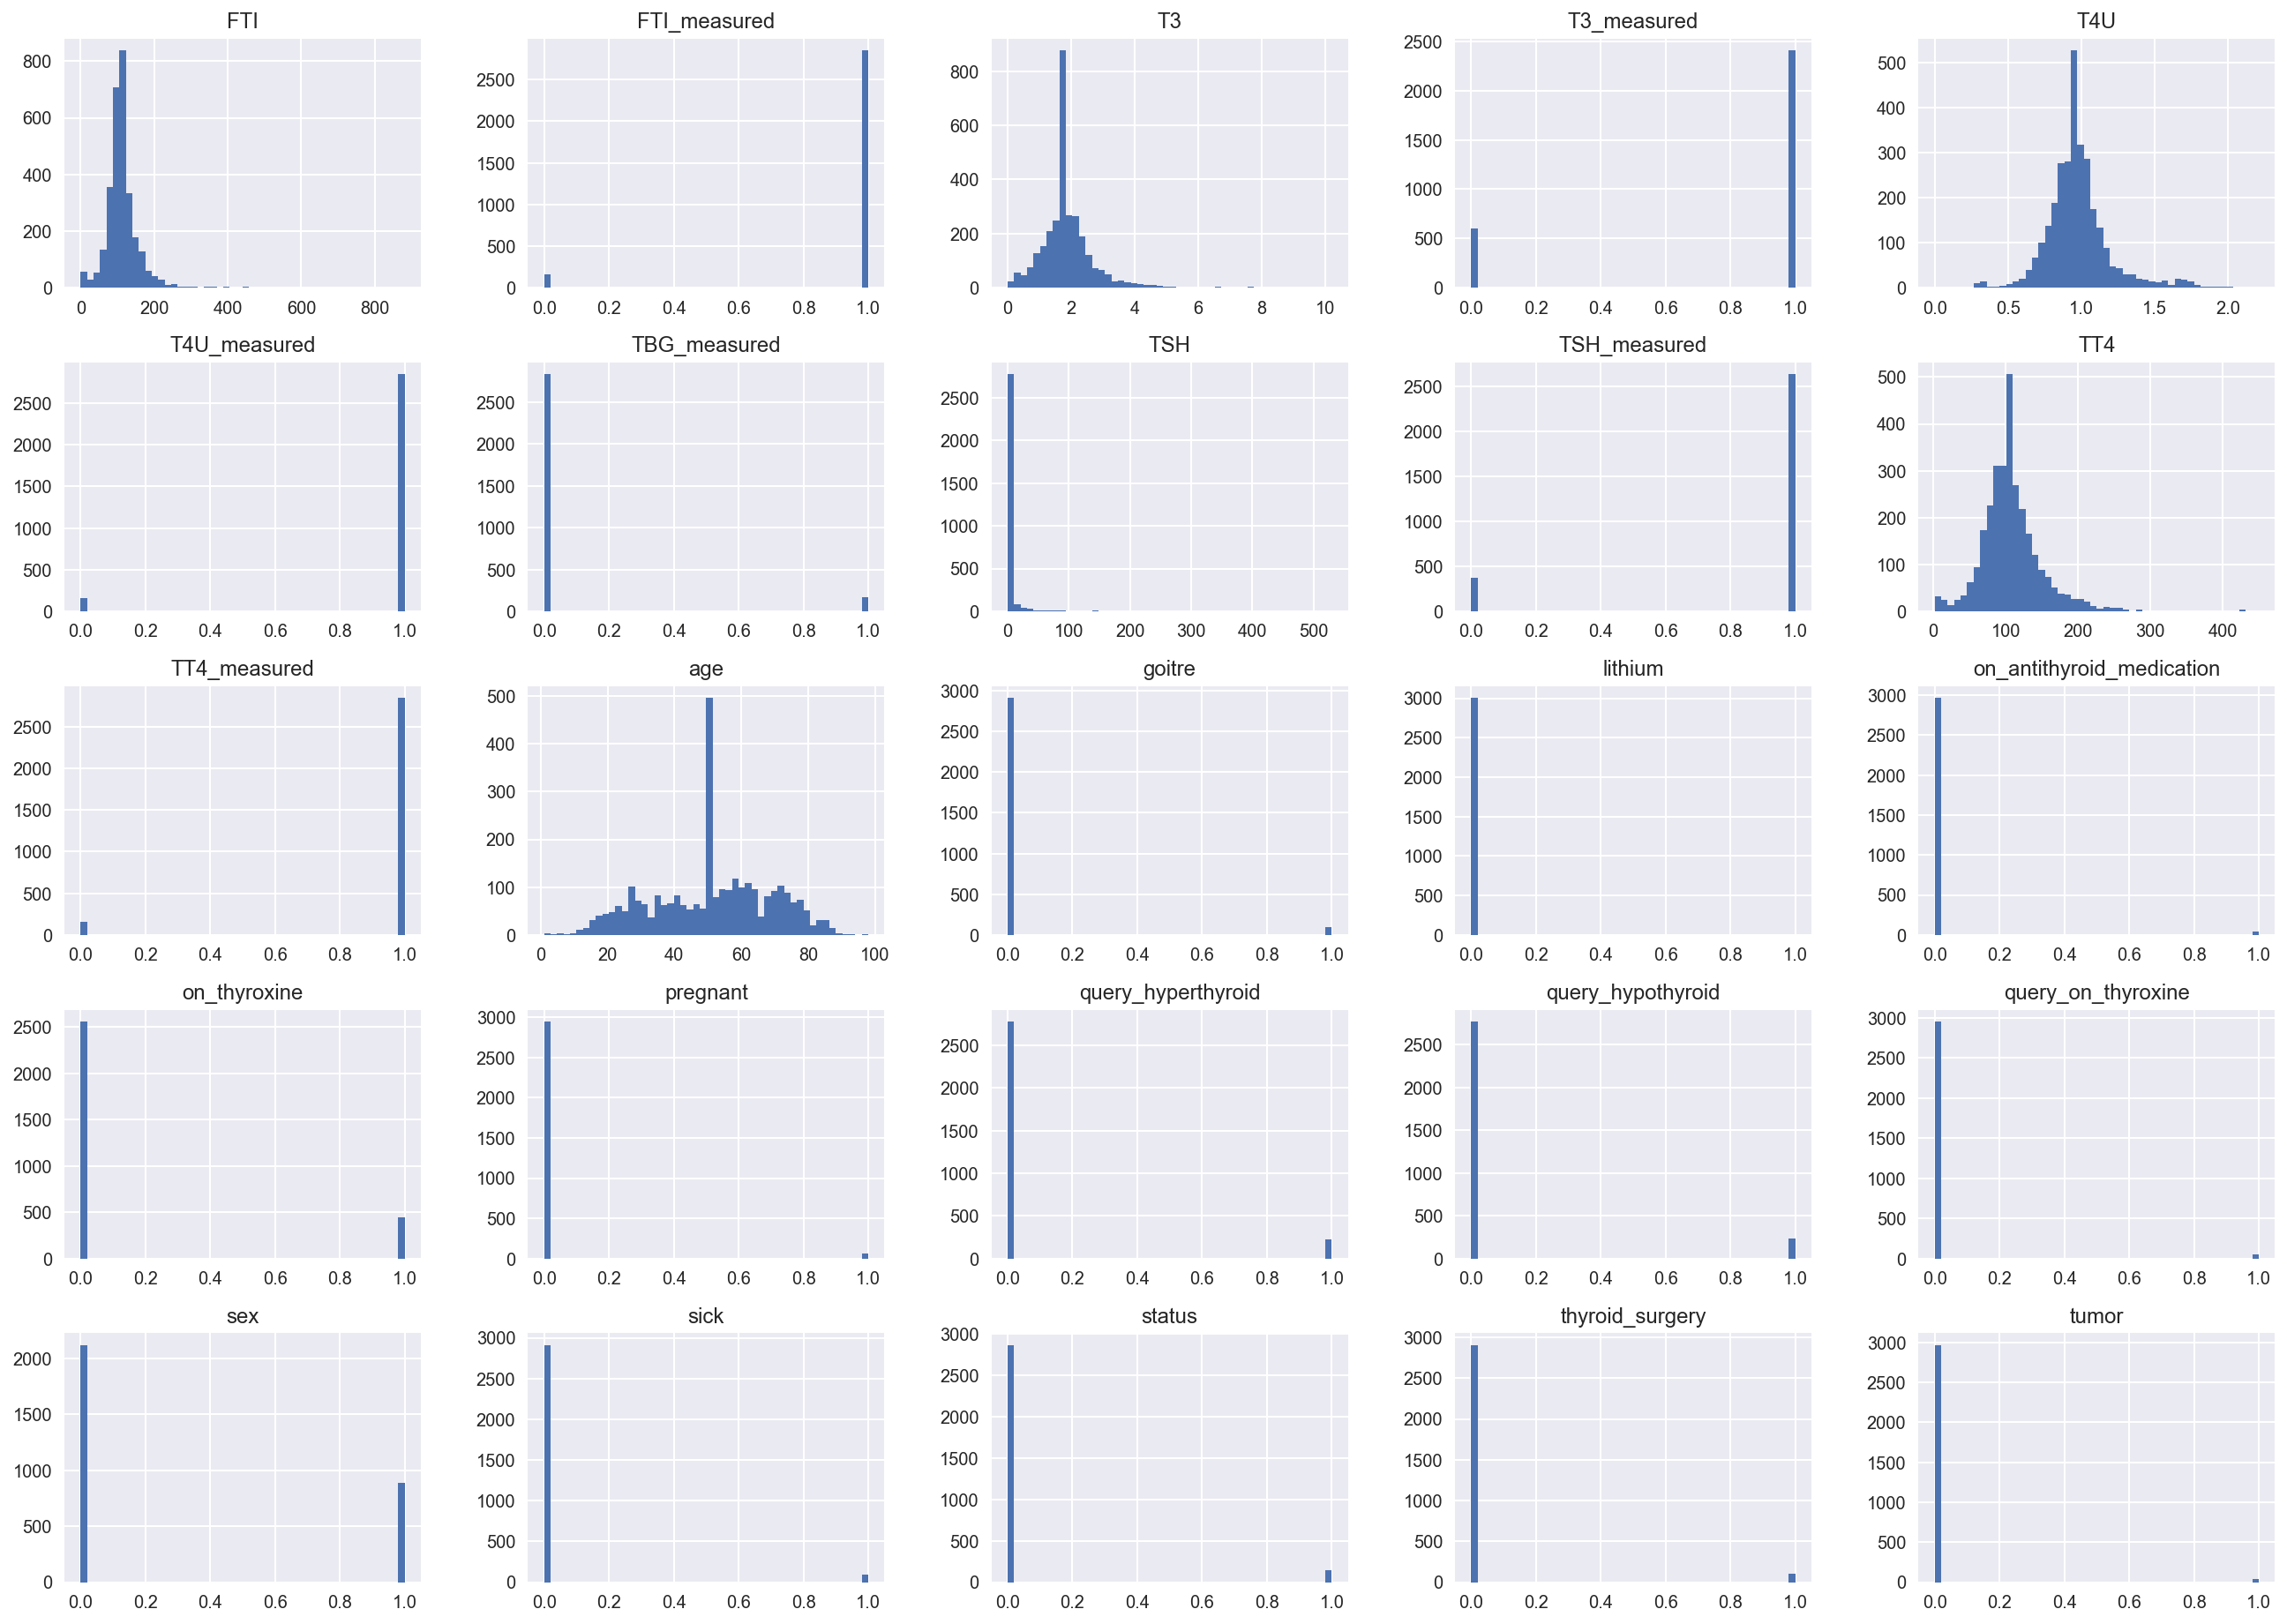

In [180]:
#Distribution plot
df.hist(bins=50,figsize=(20,15))
plt.show()

Observations:
- Sex distribution : Dataset has almost double the female population than males.
- Status - few patients had hypothyroid disease, goitre, tumour, throid surgery, or were sick.
- Age is distributed across all age groups from 0 to 100 with higher density being between 20 and 80 years.



##### Outliers

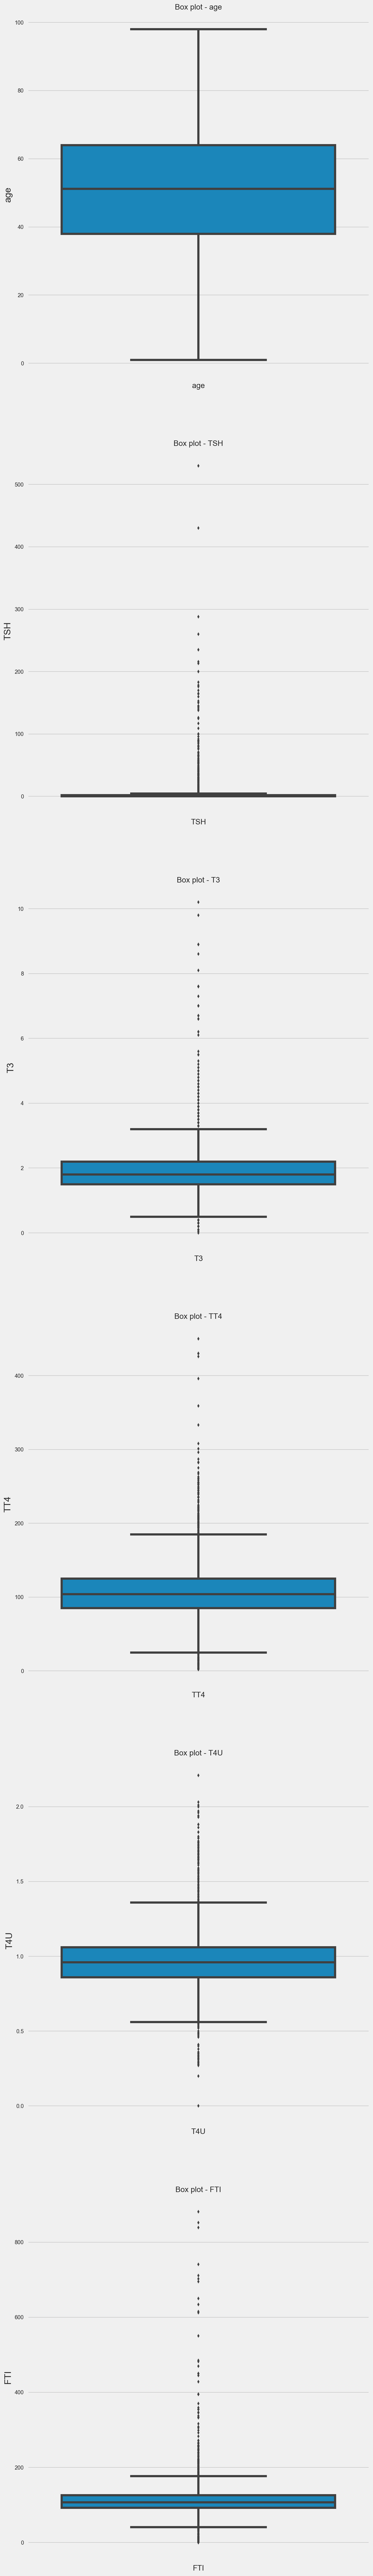

In [181]:
# The plotting is for non binary columns
def plot_boxplots(target_dataframe,col_names):
    
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=14)
        ax[i].set_xlabel(column_name, fontsize=14)
    
    plt.show()
    
    #Execute the function
outlier_columns =['age','TSH','T3','TT4','T4U','FTI']
plt.style.use('fivethirtyeight')
plot_boxplots(df,outlier_columns)

Outliers noted across all measurements for hormones : TSH, T3, TT4,T4U, FTI

Observations
As recorded above under each of the vizualiation.

Actions:
Hormonal measurements outliers noted require further research or domain analysis to confirm if it is an actual measurement or incorrect entry or calibration error. If so, that would be a justification for dropping the outliers.

For now, the outliers will not be dropped. However, during modelling, a test case for score without outliers in the 5 features above will be done to confirm impact of outliers on success outcome.

### Bi-Variate Analysis

In [ ]:
#Distribution of all variables
sns.pairplot(df.status)

#### Status versus Age

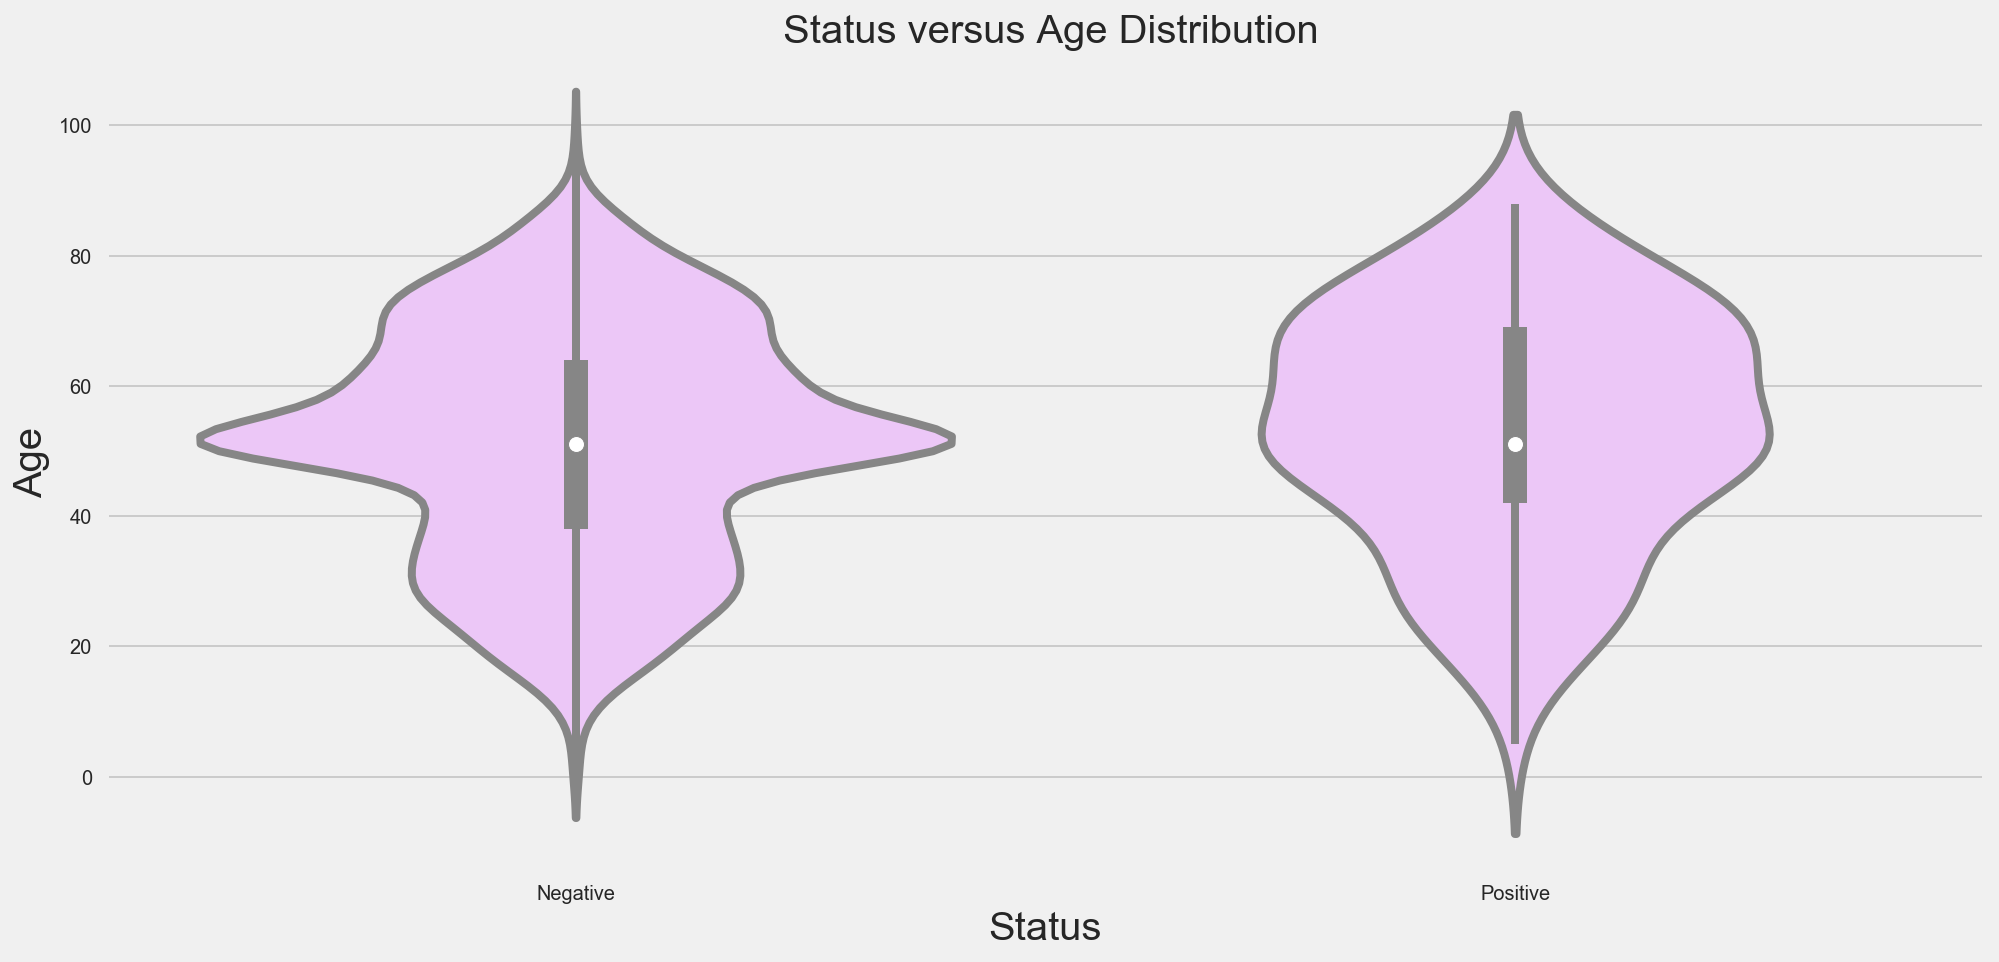

In [183]:
#Violin plot showing distribution of patients with hypothroid versus those without by age
plt.figure(figsize = (15,7))
sns.violinplot(x=df['status'], y=df['age'], color='#F0BFFF')
plt.xticks([0,1], ['Negative',  'Positive'])
plt.ylabel('Age',fontsize = 20)
plt.xlabel('Status',fontsize = 20)
plt.title(' Status versus Age Distribution',fontsize = 20)
plt.show()

As per above, hypothyroid disease affects patients at all ages but is more visible in patients above age 40. Age 70 has highest quantity of affected patients

#### Status versus Age and Gender

<function matplotlib.pyplot.show>

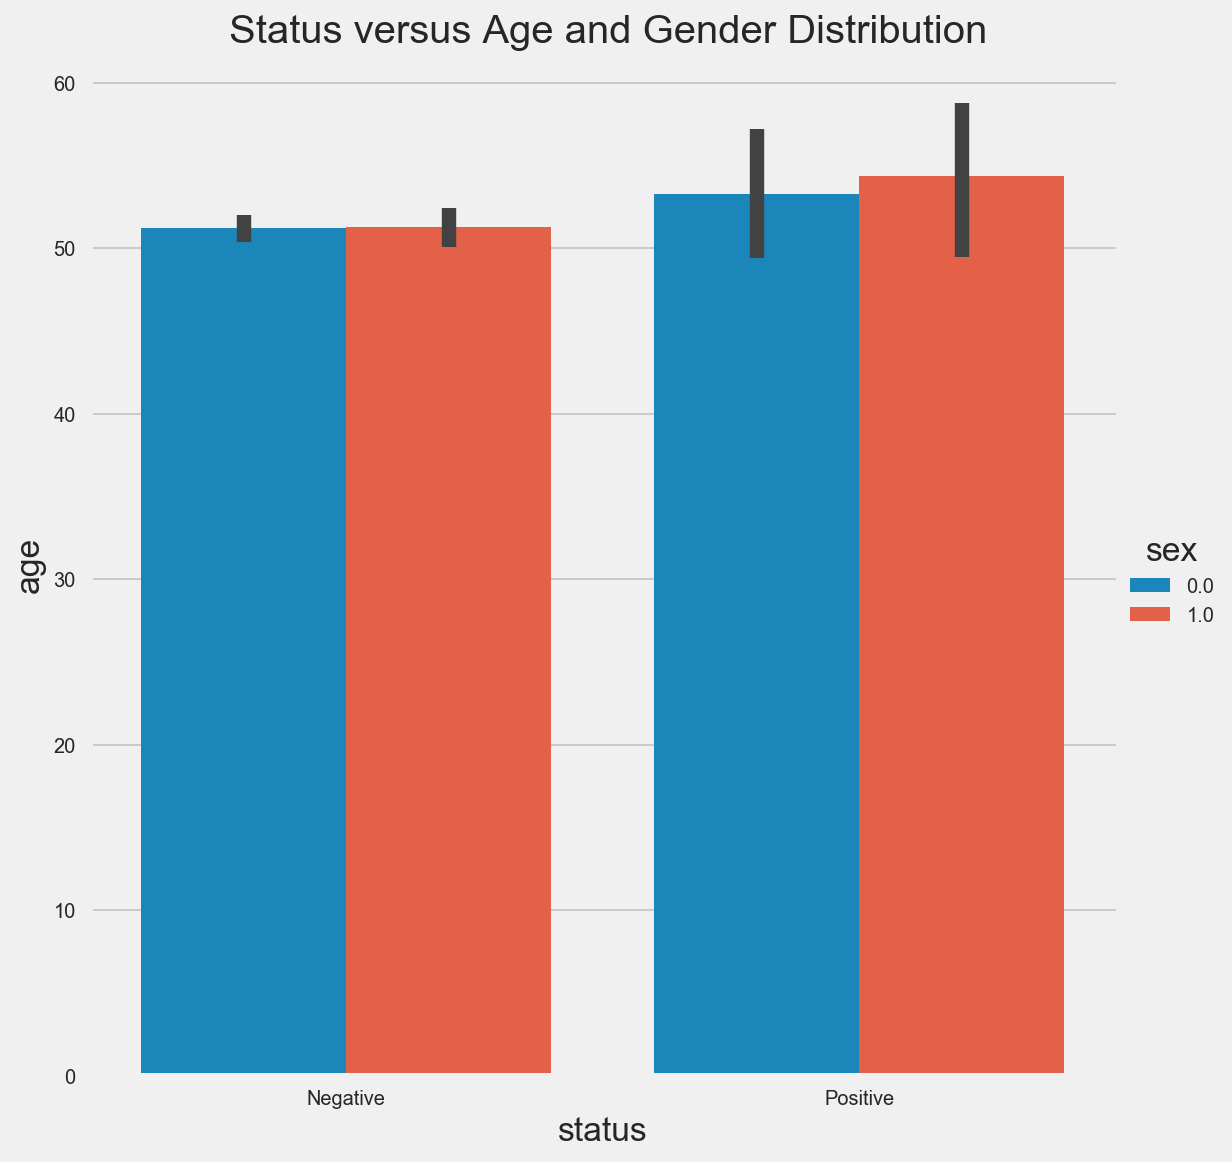

In [184]:
#Plot status by age and gender
sns.factorplot(x='status', y='age', hue="sex" , kind="bar", data=df,size=8,aspect= 1);
plt.xticks([0,1], ['Negative',  'Positive'])
plt.title(' Status versus Age and Gender Distribution',fontsize = 20)
plt.show

1 refers to male and 0 is female.
More males than females tested positive to hypothyroid desease although difference is small.

#### T3 versus TT4 hormones relationship

In [ ]:
# Scatterplot of T3 versus TT4 hormones
sns.lmplot('T3', 'TT4',data=df,fit_reg=True,size=8,aspect =2)
# Set title
plt.title('Scatter Plot of T3 versus TT4 hormones')
# Set x-axis label
plt.xlabel('T3')
# Set y-axis label
plt.ylabel('TT4')

There is a strong positive linear relationship between T3 and T4 hormones

#### Goitre versus Status

In [ ]:
sns.factorplot(x='status', y='goitre',  kind="bar", data=df,size=8,aspect= 1);
plt.xticks([0,1], ['Negative',  'Positive'])
plt.title(' Status versus Age and Gender Distribution',fontsize = 20)
plt.show

There are patients who have goitre and do not have hypothroid disease and vice-versa. Goitre does not have high correlation with hypothyroidism

### 3.4 Correlation

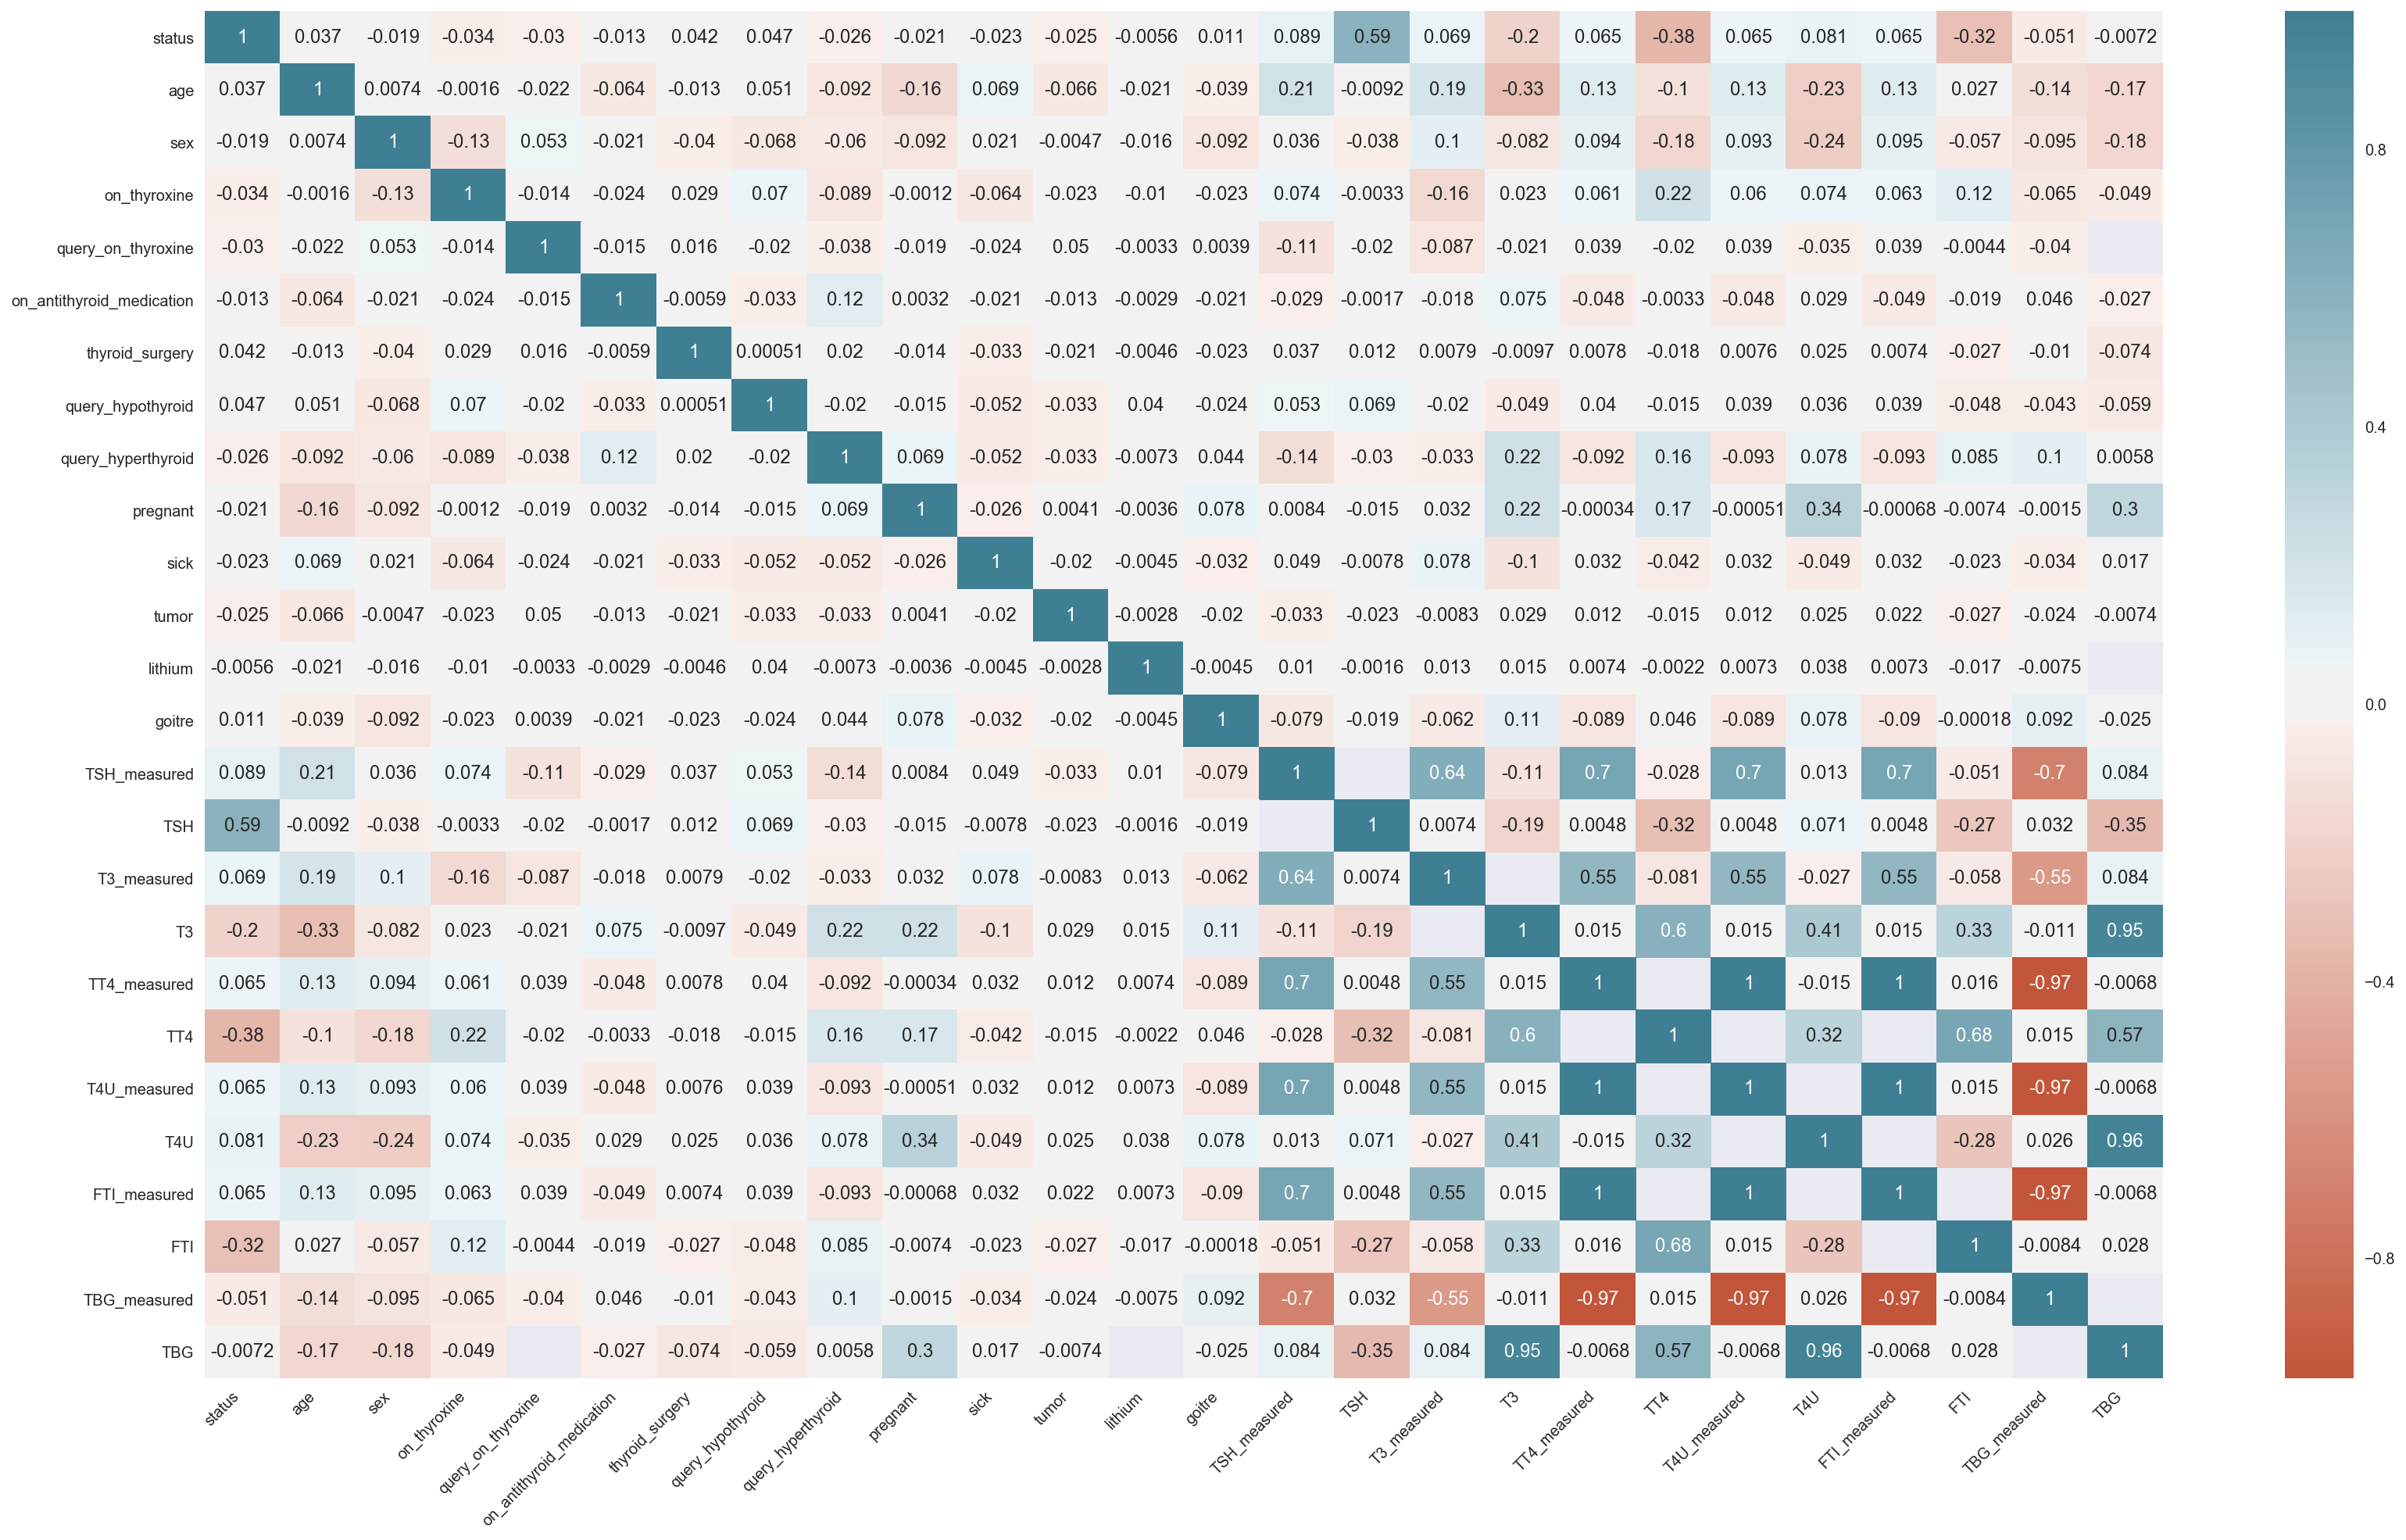

In [137]:
# Correlation 
plt.figure(figsize = (25,15))
ax = sns.heatmap(df.corr(),cmap=sns.diverging_palette(20, 220, n=256), annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.show()

Observations.
- White implies low correlation
- Blue is positive correlation. The deeper the shade of blue, the higher the positive correlation.
    TSH has medium positive correlation with status
- Brown is negative correlation. The deeper the shade of brown, the higher the negative correlation.
TT4 and FTI have slightly below average negative correlation with status.

### Pre-Modelling Additional Cleanup

#### a) Act on null values

Decision trees work okay with null values so null values will be imputed or dropped before SVM.
for i,x in enumerate(df_house.columns):
    print(x, df_house[df_house[x]==0].yr_renovated.count()/df_house[x].count()*100)

In [ ]:
df = df.replace("?", np.nan)
# df = df.replace(np.nan,"?")

## Modelling

### Split the independent and dependent variables

In [ ]:
# We want to predict if one has hypothyroid or not so dependent variable is status. 
# 1 means has disease and 0 has no disease
y = df['status'].values
x_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid','query_hyperthyroid', 'pregnant', 'sick', 
              'tumor', 'lithium', 'goitre','TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4','T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
X = df[x_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply Random Forest Classifier

#### a) Random Forest Training and Prediction

In [ ]:
# Instantiate the model and provide hyperparameters such as min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

In [ ]:
## Print Actual versus Predicted Results
plt.style.use('fivethirtyeight')
df_actual_pred = pd.DataFrame({"Actual":np.array(y_test),"Predicted":y_pred})
df_actual_pred[:50].plot(figsize=(15,5),kind='bar')
plt.show()

#### b) Model Results

In [ ]:
## Model Results: Errors and Score
rf_meanAbsError=round(mean_absolute_error(np.array(y_test),y_pred),2)
rf_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred),2)
rf_rootMeanSqrdError=round(np.sqrt(rf_meanSqrdError),2)

print("Random Forest R2 score is ",round(r2_score(y_test, y_pred),4))

print("Mean Absolute Error=",rf_meanAbsError)
print("Mean Squared Error=",rf_meanSqrdError)
print("Root Mean Squared Error=",rf_rootMeanSqrdError)

#### c) Tree output

In [ ]:
## Check the performance of sample tree output
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())


#### d) Feature Importance

In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
#Visual representation of importance
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, x_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**Model Assessment**
How accurate is the model you've created? What parameters have you used to tweak it?
What can you conclude about the fit of your model?




### AdaBoost Regression



#### AdaBoost training and prediction

In [ ]:
# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),
                          n_estimators=40, random_state=42)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

#### Adaboost Results

In [ ]:
## Model Results: Errors and Score
adb_meanAbsError=round(mean_absolute_error(np.array(y_test),y_pred_ada),2)
adb_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred_ada),2)
adb_rootMeanSqrdError=round(np.sqrt(adb_meanSqrdError),2)

print("Adaboost R2 score is ",round(r2_score(y_test, y_pred_ada),4))

print("Mean Absolute Error=",adb_meanAbsError)
print("Mean Squared Error=",adb_meanSqrdError)
print("Root Mean Squared Error=",adb_rootMeanSqrdError)

#### Adaboost Observations

### Gradient Boosting Regressor

#### Gradient boosting training and prediction

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 400

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=8)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

#### Gradient Boosting results

In [ ]:
## Model Results: Errors and Score
gbr_meanAbsError=round(mean_absolute_error(np.array(y_test),y_pred_gbr),2)
gbr_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred_gbr),2)
gbr_rootMeanSqrdError=round(np.sqrt(gbr_meanSqrdError),2)

print("Gradient Boosting R2 score is ",round(r2_score(y_test, y_pred_gbr),4))

print("Mean Absolute Error=",gbr_meanAbsError)
print("Mean Squared Error=",gbr_meanSqrdError)
print("Root Mean Squared Error=",gbr_rootMeanSqrdError)

In [ ]:
##### Pre-SVM modelling Cleanup

In [ ]:
#### Imputation of missing values data
# Mean imputation applied as data does not have alot of outliers

# age :- 446 ,sex :- 73 , TSH :- 468, T3 :- 695, TT4 :- 249, T4U :- 248, FTI :- 247, TBG :- 2903

### Support Vector Machine Regression

#### Training and Predicting

In [ ]:
throid_model = SVC(kernel = 'rbf')

# Train the model using the training set
throid_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = throid_model.predict(X_test)

#### Results

In [ ]:
## Model Results: Errors and Score
svc_meanAbsError=round(mean_absolute_error(np.array(y_test),y_pred),2)
svc_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred),2)
svc_rootMeanSqrdError=round(np.sqrt(svc_meanSqrdError),2)

print("Support Vector R2 score is ",round(r2_score(y_test, y_pred),4))

print("Mean Absolute Error=",svc_meanAbsError)
print("Mean Squared Error=",svc_meanSqrdError)
print("Root Mean Squared Error=",svc_rootMeanSqrdError)

#### Observations

## Model Tuning

1 First run with no finetuning

a) MLR baseline R squared score of 68.93% achieved with all Y as independent and all others as dependent.

b) Rige R squared score of 71% achieved

c) Lasso R squared score of 71% achieved

2 Creation of new features building age and total space

No notable improvement in the model

3.Normalization of price to ensure it's normal.

This was done using log transformation. After normalization, model improved by baseline of 10%

a) MLR baseline R squared score of 76% achieved with all Y as independent and all others as dependent.

b) Ridge R squared score of 77% achieved

c) Lasso R squared score of 77% achieved


4 Removal of columns with multicollineality.

Removing the columns such as zip and lat long and space columns which have multicolleaniality makes the model's accuracy even lower. Hence these were not removed. Nevertheless, Lasso model is able to perform variable selection of which the multilinear columns were observed to have their coefficients reduced to zero.


## Model Evaluation

#### R2 Scores for the models are as below
Multiple Linear Regression - 76.69%

Ridge - 54% on Q3

Ridge - 77.1%

Lasso - 77.1%

Elastic net Regression - 77.03%

#### Recommendation:  We recommend adoption of Lasso regression due to simplicity of the model. 
It has minimized bathrooms, lattitude, sqft_living15 to zero hence simplifying the model.
Lasso score is at par with Ridge and Elastic search.

#### Future Enhancements

Consider dropping the extreme outliers e.g in price, bedrooms(33) and reprocess the models for enhanced accuracy.